In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
# Seed for reproducibility
np.random.seed(42)

# 1. Create non-linear data
X_nonlinear = np.linspace(-3, 3, 200)
y_nonlinear = np.sin(X_nonlinear) + np.random.normal(0, 0.1, X_nonlinear.shape)

In [3]:
X_nonlinear

array([-3.        , -2.96984925, -2.93969849, -2.90954774, -2.87939698,
       -2.84924623, -2.81909548, -2.78894472, -2.75879397, -2.72864322,
       -2.69849246, -2.66834171, -2.63819095, -2.6080402 , -2.57788945,
       -2.54773869, -2.51758794, -2.48743719, -2.45728643, -2.42713568,
       -2.39698492, -2.36683417, -2.33668342, -2.30653266, -2.27638191,
       -2.24623116, -2.2160804 , -2.18592965, -2.15577889, -2.12562814,
       -2.09547739, -2.06532663, -2.03517588, -2.00502513, -1.97487437,
       -1.94472362, -1.91457286, -1.88442211, -1.85427136, -1.8241206 ,
       -1.79396985, -1.7638191 , -1.73366834, -1.70351759, -1.67336683,
       -1.64321608, -1.61306533, -1.58291457, -1.55276382, -1.52261307,
       -1.49246231, -1.46231156, -1.4321608 , -1.40201005, -1.3718593 ,
       -1.34170854, -1.31155779, -1.28140704, -1.25125628, -1.22110553,
       -1.19095477, -1.16080402, -1.13065327, -1.10050251, -1.07035176,
       -1.04020101, -1.01005025, -0.9798995 , -0.94974874, -0.91

In [4]:
y_nonlinear

array([-0.09144859, -0.1847268 , -0.13575652, -0.07766512, -0.28261714,
       -0.31161358, -0.1590147 , -0.26864052, -0.42046549, -0.34705658,
       -0.47508409, -0.5023553 , -0.4582118 , -0.69992325, -0.70681189,
       -0.61578805, -0.68557295, -0.57706454, -0.72293799, -0.79643766,
       -0.53111853, -0.72212114, -0.71401491, -0.88381159, -0.81567022,
       -0.76934289, -0.91402831, -0.77912672, -0.89378558, -0.87915843,
       -0.92565442, -0.69496391, -0.89544934, -1.01296586, -0.83721078,
       -1.05298436, -0.92060216, -1.14718825, -1.0929079 , -0.94839851,
       -0.90135332, -0.96429204, -0.99833048, -1.02131582, -1.14259645,
       -1.06936326, -1.04517068, -0.89421435, -0.96547559, -1.17514343,
       -0.96452506, -1.03262952, -1.05809768, -0.92462175, -0.87717725,
       -0.88074594, -1.05050721, -0.98933957, -0.91625366, -0.84192418,
       -0.97664082, -0.93568979, -1.01532422, -1.01105585, -0.79611676,
       -0.72688196, -0.85405958, -0.73008809, -0.77710573, -0.85

In [5]:
# 2. Add outliers
X_outliers = np.random.uniform(-3, 3, 10)
y_outliers = np.random.uniform(-2, 2, 10)
X_total = np.concatenate([X_nonlinear, X_outliers])
y_total = np.concatenate([y_nonlinear, y_outliers])

In [6]:
# 3. Add high dimensionality (create 10 random features)
high_dim_features = np.random.randn(len(X_total), 10)
df = pd.DataFrame(high_dim_features, columns=[f"feature_{i}" for i in range(10)])
df["X"] = X_total
df["target"] = y_total

In [7]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,X,target
0,-0.485364,0.081874,2.314659,-1.867265,0.686260,-1.612716,-0.471932,1.088951,0.064280,-1.077745,-3.000000,-0.091449
1,-0.715304,0.679598,-0.730367,0.216459,0.045572,-0.651600,2.143944,0.633919,-2.025143,0.186454,-2.969849,-0.184727
2,-0.661786,0.852433,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,-2.939698,-0.135757
3,1.765454,0.404982,-1.260884,0.917862,2.122156,1.032465,-1.519370,-0.484234,1.266911,-0.707669,-2.909548,-0.077665
4,0.443819,0.774634,-0.926930,-0.059525,-3.241267,-1.024388,-0.252568,-1.247783,1.632411,-1.430141,-2.879397,-0.282617


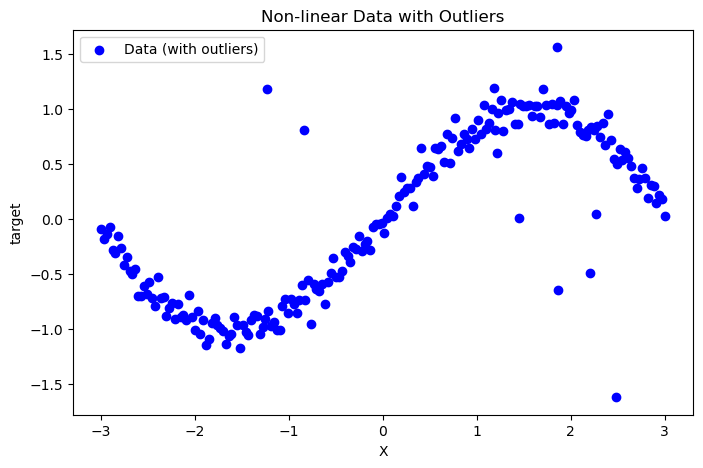

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,X,target
0,-0.485364,0.081874,2.314659,-1.867265,0.686260,-1.612716,-0.471932,1.088951,0.064280,-1.077745,-3.000000,-0.091449
1,-0.715304,0.679598,-0.730367,0.216459,0.045572,-0.651600,2.143944,0.633919,-2.025143,0.186454,-2.969849,-0.184727
2,-0.661786,0.852433,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,-2.939698,-0.135757
3,1.765454,0.404982,-1.260884,0.917862,2.122156,1.032465,-1.519370,-0.484234,1.266911,-0.707669,-2.909548,-0.077665
4,0.443819,0.774634,-0.926930,-0.059525,-3.241267,-1.024388,-0.252568,-1.247783,1.632411,-1.430141,-2.879397,-0.282617


In [8]:
# Plot the main feature vs target to show non-linearity & outliers
plt.figure(figsize=(8,5))
plt.scatter(X_total, y_total, color='blue', label='Data (with outliers)')
plt.title('Non-linear Data with Outliers')
plt.xlabel('X')
plt.ylabel('target')
plt.legend()
plt.show()

# Show sample of high dimensional dataset
df.head()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Step 1: Load the Dataset
df = pd.read_csv("F:\\01. The Data Psychology\\4. New_Machine Learning\\7. Random Forest\\18. Flight_price_clean.csv")

In [12]:
df.head()

,flight_id,departure_city,destination_city,airline,departure_hour,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd
0,1,Los Angeles,Denver,United,19,4509,30,0,5.1,High,311.29
1,2,New York,Miami,United,8,1285,3,0,2.0,Low,214.26
2,3,Miami,Houston,Southwest,19,4664,35,0,5.5,Low,203.16
3,4,Houston,Denver,Southwest,18,4444,71,0,4.7,High,297.55
4,5,Houston,Boston,United,19,4286,76,1,5.1,Medium,253.25


In [13]:
df.isnull().sum()

flight_id                0
departure_city           0
destination_city         0
airline                  0
departure_hour           0
distance_km              0
booking_days             0
is_weekend               0
flight_duration_hours    0
demand_level             0
price_usd                0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
# Step 2: Data Preprocessing
# Drop flight_id (not useful for prediction)
df = df.drop('flight_id', axis=1)

In [16]:
# Handle categorical variables
le_departure = LabelEncoder()
le_destination = LabelEncoder()
le_airline = LabelEncoder()
le_demand = LabelEncoder()

In [17]:
df['departure_city'] = le_departure.fit_transform(df['departure_city'])
df['destination_city'] = le_destination.fit_transform(df['destination_city'])
df['airline'] = le_airline.fit_transform(df['airline'])
df['demand_level'] = le_demand.fit_transform(df['demand_level'])

In [18]:
df.isnull().sum().sum()

0

In [19]:
# Check for missing values (none expected in synthetic data)
assert df.isnull().sum().sum() == 0, "Missing values detected"

In [20]:
# Step 3: Feature Engineering
# Create new feature: time_of_day
df['time_of_day'] = pd.cut(df['departure_hour'], 
                          bins=[0, 6, 12, 18, 24], 
                          labels=[0, 1, 2, 3],  # Night, Morning, Afternoon, Evening
                          include_lowest=True)

In [21]:
#Create interaction feature: distance per hour
df['distance_per_hour'] = df['distance_km'] / df['flight_duration_hours']

In [22]:
# Drop original departure_hour (replaced by time_of_day)
df = df.drop('departure_hour', axis=1)

In [23]:
df.head(2)

,departure_city,destination_city,airline,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd,time_of_day,distance_per_hour
0,5,3,4,4509,30,0,5.1,0,311.29,3,884.117647
1,7,6,4,1285,3,0,2.0,1,214.26,1,642.500000


In [24]:
# Step 4: Split Features and Target
X = df.drop('price_usd', axis=1)
y = df['price_usd']

In [25]:
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 10), (400, 10), (1600,), (400,))

In [27]:
# Step 7: Initialize Random Forest Model
rf = RandomForestRegressor(random_state=42)

In [28]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
rf.score(X_test,y_test)

0.9794674528847119

In [30]:
# Evaluate Model
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error: 15.06
R² Score: 0.98


In [32]:
# Hyperparameter Tuning with GridSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']  # Removed 'auto' as it's deprecated
}
    

In [33]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    n_jobs=-1,
    random_state=42,
    verbose=2  # Optional: to see progress
)

In [34]:
# Fit on training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [35]:
# Get best model
best_rf = random_search.best_estimator_

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [36]:
# Predict on training data
y_train_pred = best_rf.predict(X_train)

# Predict on test data
y_test_pred = best_rf.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Training metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Training R²:", train_r2)

print("Testing RMSE:", test_rmse)
print("Testing MAE:", test_mae)
print("Testing R²:", test_r2)


Training RMSE: 8.851606995121097
Training MAE: 6.1343974583333445
Training R²: 0.9931814480098519
Testing RMSE: 24.569610161088804
Testing MAE: 17.510421166666685
Testing R²: 0.945328584365465


In [ ]:
import joblib

# Save the model
joblib.dump(best_rf, "best_random_forest_model.pkl")

# To load it later
# best_rf = joblib.load("best_random_forest_model.pkl")

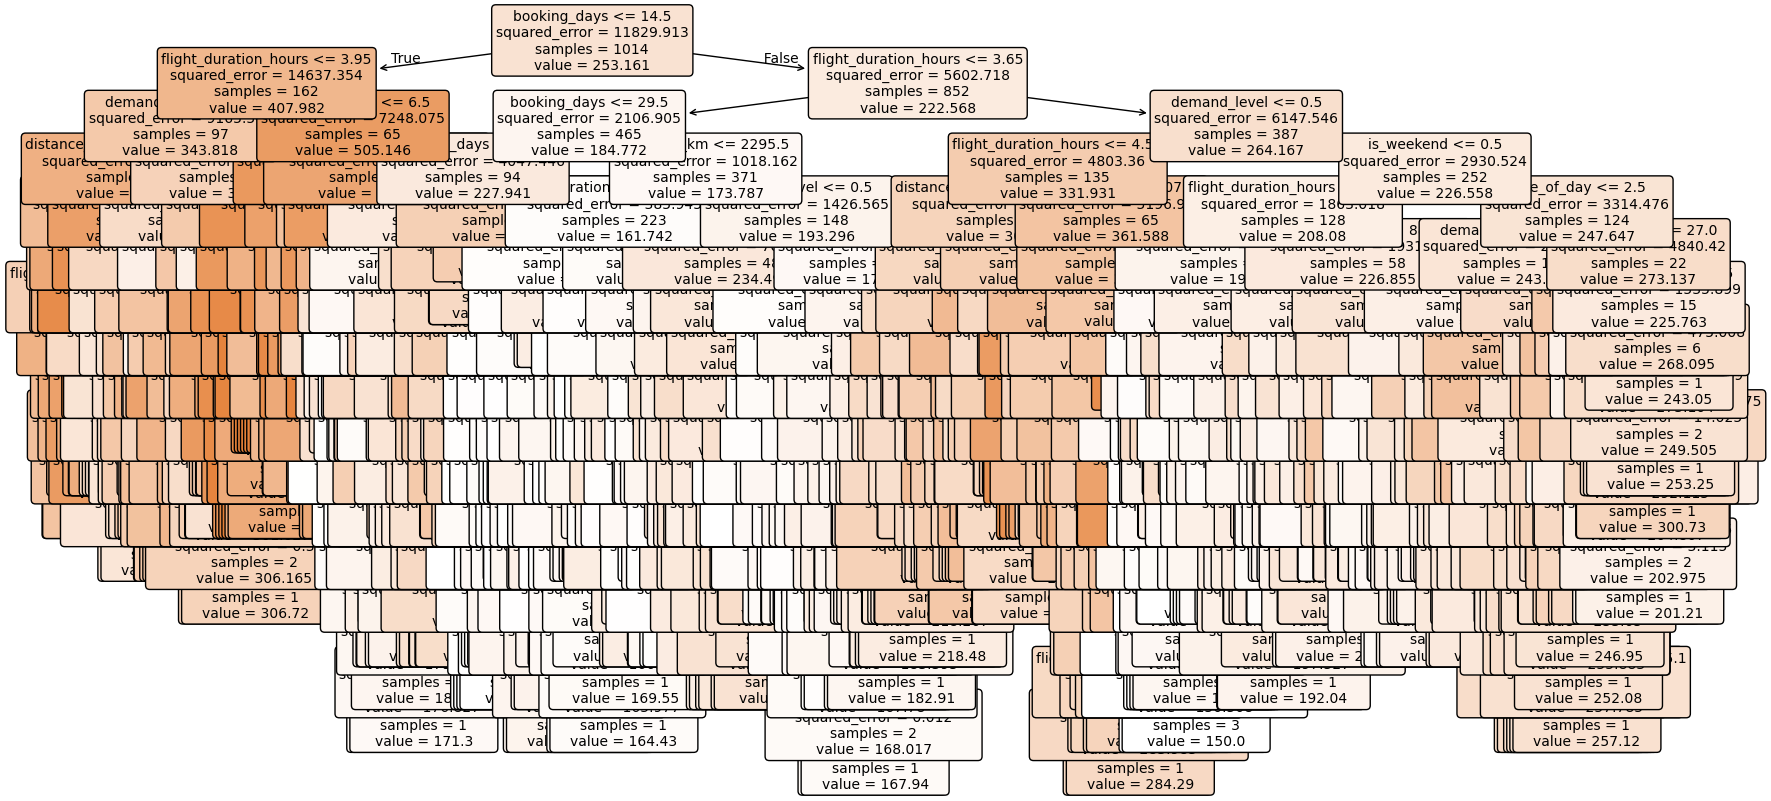

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

# Pick one tree from the forest
estimator = best_rf.estimators_[0]  # 0th tree in the forest

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(estimator,
               feature_names=X_train.columns,
               filled=True,
               rounded=True,
               fontsize=10)
plt.show()


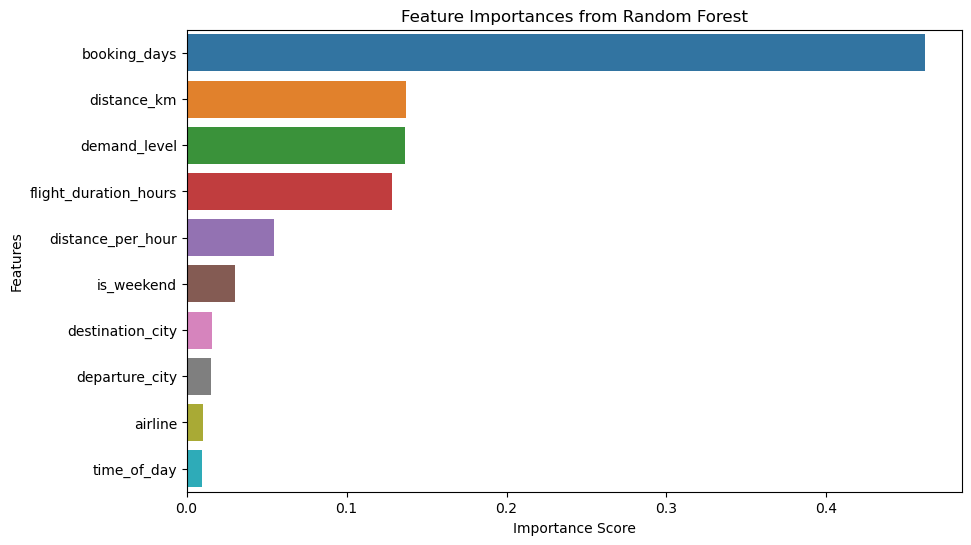

In [39]:
import pandas as pd
import seaborn as sns

# Feature importances
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()